# 強大的容器：Pandas
<img src = "https://s3-ap-south-1.amazonaws.com/av-blog-media/wp-content/uploads/2018/03/pandas.jpg" width = 200></img>

- 參考材料：
    - 官方文件：https://pandas.pydata.org/
    - Lee Ming, [資料科學家的 pandas 實戰手冊：掌握 40 個實用數據技巧](https://leemeng.tw/practical-pandas-tutorial-for-aspiring-data-scientists.html), 2019-07-27 

- 台灣COVID-19疫情分析
    - 參考材料：
        - Lee Ming, [存取台灣 COVID-19 疫情數據並繪製疾管署趨勢圖表](https://covid19.leemeng.tw/use-pandas-and-altair-to-access-public-data-and-basic-plotting.html), 2020-04-13
        - 最詳細的確診資料：https://docs.google.com/spreadsheets/d/1Kp5IC5IEI2ffaOSZY1daYoi2u50bjUHJW-IgfHoEq8o/edit?usp=sharing

In [ ]:
import pandas as pd

# Google 試算表的基本 url pattern
GOOGLE_SHEET_URL = "https://docs.google.com/spreadsheets/d/{}/export?gid={}&format=csv"
tbl = pd.read_csv(GOOGLE_SHEET_URL.format("1Kp5IC5IEI2ffaOSZY1daYoi2u50bjUHJW-IgfHoEq8o", 1173642744))
tbl

日期  ...               來源：疾管署 (每天1am更新)
0    1/16  ...  事實上1/2起「嚴重肺炎&10日內武漢旅史」就能通報檢驗 
1    1/17  ...                            NaN
2    1/18  ...                            NaN
3    1/19  ...                            NaN
4    1/20  ...                            NaN
..    ...  ...                            ...
515  6/13  ...                            NaN
516  6/14  ...                            NaN
517  6/15  ...                            NaN
518  6/16  ...                            NaN
519   NaN  ...                            NaN

[520 rows x 15 columns]

## 資料預處理

### 選擇所需要的時間與欄位

In [ ]:
columns = ["日期", "確診人數", "確診人數累計"]
tbl = tbl.loc[352:, columns]
tbl

日期   確診人數   確診人數累計
352   1/1    3.0    802.0
353   1/2    6.0    808.0
354   1/3    4.0    812.0
355   1/4    3.0    815.0
356   1/5    2.0    817.0
..    ...    ...      ...
515  6/13  175.0  12919.0
516  6/14  185.0  13104.0
517  6/15  135.0  13239.0
518  6/16  170.0  13409.0
519   NaN  175.0  13584.0

[168 rows x 3 columns]

### 去除缺值


In [ ]:
tbl.dropna(inplace = True)
tbl.tail()

日期   確診人數   確診人數累計
514  6/12  250.0  12744.0
515  6/13  175.0  12919.0
516  6/14  185.0  13104.0
517  6/15  135.0  13239.0
518  6/16  170.0  13409.0

### 將文字轉換成日期並設定為索引

In [ ]:
tbl["日期"] = pd.to_datetime(tbl["日期"].dropna().apply(lambda x : "2021/" + x))
tbl.set_index("日期", inplace = True)
tbl.tail() # show the last 5 items

確診人數   確診人數累計
日期                        
2021-06-12  250.0  12744.0
2021-06-13  175.0  12919.0
2021-06-14  185.0  13104.0
2021-06-15  135.0  13239.0
2021-06-16  170.0  13409.0

### 選擇較新的資料

In [ ]:
tbl = tbl.loc["2021-05-01" : ]
tbl.head()

確診人數  確診人數累計
日期                      
2021-05-01   4.0  1132.0
2021-05-02   5.0  1137.0
2021-05-03   8.0  1145.0
2021-05-04   8.0  1153.0
2021-05-05   7.0  1160.0

## 資料的概觀

In [ ]:
tbl.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 47 entries, 2021-05-01 to 2021-06-16
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   確診人數    47 non-null     float64
 1   確診人數累計  47 non-null     float64
dtypes: float64(2)
memory usage: 1.1 KB


In [ ]:
tbl.describe()

確診人數        確診人數累計
count   47.000000     47.000000
mean   261.297872   6209.893617
std    196.359355   4588.771410
min      1.000000   1132.000000
25%     23.000000   1243.500000
50%    273.000000   5674.000000
75%    446.500000  10699.500000
max    536.000000  13409.000000

## 資料存取

### 資料的索引
- 通常視視作為圖形上的 x 軸。

In [ ]:
tbl.index

DatetimeIndex(['2021-05-01', '2021-05-02', '2021-05-03', '2021-05-04',
               '2021-05-05', '2021-05-06', '2021-05-07', '2021-05-08',
               '2021-05-09', '2021-05-10', '2021-05-11', '2021-05-12',
               '2021-05-13', '2021-05-14', '2021-05-15', '2021-05-16',
               '2021-05-17', '2021-05-18', '2021-05-19', '2021-05-20',
               '2021-05-21', '2021-05-22', '2021-05-23', '2021-05-24',
               '2021-05-25', '2021-05-26', '2021-05-27', '2021-05-28',
               '2021-05-29', '2021-05-30', '2021-05-31', '2021-06-01',
               '2021-06-02', '2021-06-03', '2021-06-04', '2021-06-05',
               '2021-06-06', '2021-06-07', '2021-06-08', '2021-06-09',
               '2021-06-10', '2021-06-11', '2021-06-12', '2021-06-13',
               '2021-06-14', '2021-06-15', '2021-06-16'],
              dtype='datetime64[ns]', name='日期', freq=None)

### 資料欄位


In [ ]:
tbl.columns

Index(['確診人數', '確診人數累計'], dtype='object')

### 資料的值

In [ ]:
tbl.values

array([[4.0000e+00, 1.1320e+03],
       [5.0000e+00, 1.1370e+03],
       [8.0000e+00, 1.1450e+03],
       [8.0000e+00, 1.1530e+03],
       [7.0000e+00, 1.1600e+03],
       [1.3000e+01, 1.1730e+03],
       [5.0000e+00, 1.1780e+03],
       [5.0000e+00, 1.1830e+03],
       [1.0000e+00, 1.1840e+03],
       [1.5000e+01, 1.1990e+03],
       [1.1000e+01, 1.2100e+03],
       [2.1000e+01, 1.2310e+03],
       [2.5000e+01, 1.2560e+03],
       [3.5000e+01, 1.2910e+03],
       [1.9000e+02, 1.4810e+03],
       [2.8200e+02, 1.7630e+03],
       [5.3600e+02, 2.2990e+03],
       [4.5900e+02, 2.7580e+03],
       [5.3300e+02, 3.2910e+03],
       [4.8100e+02, 3.7720e+03],
       [4.3400e+02, 4.2060e+03],
       [4.7400e+02, 4.6800e+03],
       [4.8800e+02, 5.1680e+03],
       [5.0600e+02, 5.6740e+03],
       [5.0000e+02, 6.1740e+03],
       [5.3300e+02, 6.7070e+03],
       [5.3100e+02, 7.2380e+03],
       [4.1500e+02, 7.6530e+03],
       [4.1900e+02, 8.0720e+03],
       [4.2500e+02, 8.4970e+03],
       [3.

### 利用欄位名取出一整欄的資料

In [ ]:
tbl["確診人數"]

日期
2021-05-01      4.0
2021-05-02      5.0
2021-05-03      8.0
2021-05-04      8.0
2021-05-05      7.0
2021-05-06     13.0
2021-05-07      5.0
2021-05-08      5.0
2021-05-09      1.0
2021-05-10     15.0
2021-05-11     11.0
2021-05-12     21.0
2021-05-13     25.0
2021-05-14     35.0
2021-05-15    190.0
2021-05-16    282.0
2021-05-17    536.0
2021-05-18    459.0
2021-05-19    533.0
2021-05-20    481.0
2021-05-21    434.0
2021-05-22    474.0
2021-05-23    488.0
2021-05-24    506.0
2021-05-25    500.0
2021-05-26    533.0
2021-05-27    531.0
2021-05-28    415.0
2021-05-29    419.0
2021-05-30    425.0
2021-05-31    398.0
2021-06-01    336.0
2021-06-02    486.0
2021-06-03    413.0
2021-06-04    335.0
2021-06-05    469.0
2021-06-06    313.0
2021-06-07    204.0
2021-06-08    219.0
2021-06-09    273.0
2021-06-10    265.0
2021-06-11    286.0
2021-06-12    250.0
2021-06-13    175.0
2021-06-14    185.0
2021-06-15    135.0
2021-06-16    170.0
Name: 確診人數, dtype: float64

### 利用索引值取出同索引的資料

In [ ]:
tbl.loc["2021-05-28"]

確診人數       415.0
確診人數累計    7653.0
Name: 2021-05-28 00:00:00, dtype: float64

In [ ]:
tbl.loc["2021-05-28" : "2021-06-05"]

確診人數   確診人數累計
日期                        
2021-05-28  415.0   7653.0
2021-05-29  419.0   8072.0
2021-05-30  425.0   8497.0
2021-05-31  398.0   8895.0
2021-06-01  336.0   9231.0
2021-06-02  486.0   9717.0
2021-06-03  413.0  10130.0
2021-06-04  335.0  10465.0
2021-06-05  469.0  10934.0

### 利用位址取出需要的範圍資料

In [ ]:
tbl.iloc[-5:] # last 5 items

確診人數   確診人數累計
日期                        
2021-06-12  250.0  12744.0
2021-06-13  175.0  12919.0
2021-06-14  185.0  13104.0
2021-06-15  135.0  13239.0
2021-06-16  170.0  13409.0

## 資料視覺化

In [ ]:
%%capture

!wget "www.csie.ntu.edu.tw/~d00922011/python/data/微軟正黑體.ttf"

In [ ]:
from matplotlib.font_manager import FontProperties

font = FontProperties(fname = "./微軟正黑體.ttf", size = 12)

Text(0, 0.5, '確診人數')

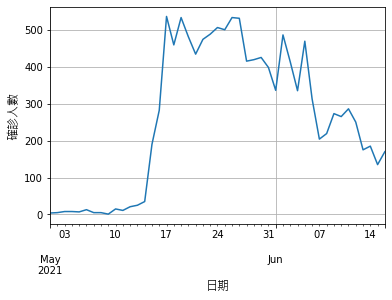

In [ ]:
ax = tbl["確診人數"].plot.line(grid = True)
ax.set_xlabel("日期", fontproperties = font)
ax.set_ylabel("確診人數", fontproperties = font)

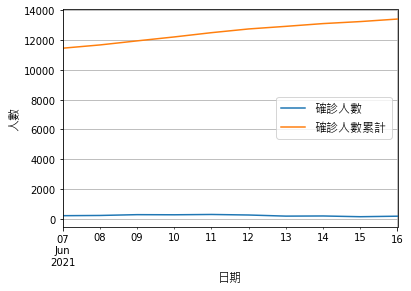

In [ ]:
ax = tbl[["確診人數", "確診人數累計"]][-10:].plot.line(grid = True)
ax.set_ylabel("人數", fontproperties = font)
ax.set_xlabel("日期", fontproperties = font)
ax.legend(prop = font)

In [ ]:
tbl.plot?

## 常見的計算

### 累積和

In [ ]:
tbl["累積確診人數 (驗證)"] = tbl["確診人數"].cumsum() + 1128
tbl.tail()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


確診人數   確診人數累計  累積確診人數 (驗證)
日期                                     
2021-06-12  250.0  12744.0      12744.0
2021-06-13  175.0  12919.0      12919.0
2021-06-14  185.0  13104.0      13104.0
2021-06-15  135.0  13239.0      13239.0
2021-06-16  170.0  13409.0      13409.0

### 滾動式累加

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


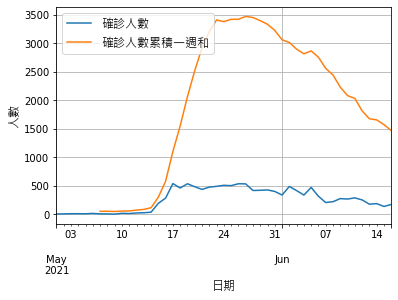

In [ ]:
tbl["確診人數累積一週和"] = tbl["確診人數"].rolling(7).sum()
ax = tbl[["確診人數", "確診人數累積一週和"]].plot.line(grid = True)
ax.set_ylabel("人數", fontproperties = font)
ax.set_xlabel("日期", fontproperties = font)
ax.legend(prop = font)

### 百分變化率

In [ ]:
tbl["確診人數日變化率 (%)"] = tbl["確診人數"].pct_change() * 100

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


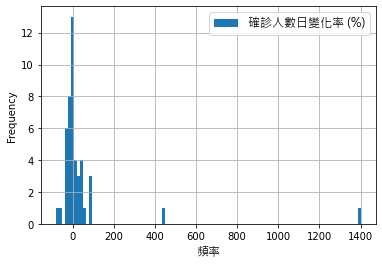

In [ ]:
ax = tbl["確診人數日變化率 (%)"].plot.hist(bins = 101, grid = True)
ax.set_xlabel("變化率", fontproperties = font)
ax.set_xlabel("頻率", fontproperties = font)
ax.legend(prop = font)

## 存檔

In [ ]:
tbl.to_excel("output.xlsx")

# 繪圖


## 套件：matplotlib
- 參考材料：
    - Official document: https://matplotlib.org/stable/contents.html
    - Cheat sheets: https://github.com/matplotlib/cheatsheets
    - Tutorial by Scipy: http://scipy-lectures.org/intro/matplotlib/index.html
    - Nicolas P. Rougier: http://www.labri.fr/perso/nrougier/teaching/matplotlib/

In [ ]:
import matplotlib.pyplot as plt

params = {'legend.fontsize': 'x-large',
      'figure.figsize': (12, 6),
      'axes.labelsize': 'x-large',
      'axes.titlesize': 'x-large',
      'xtick.labelsize': 'x-large',
      'ytick.labelsize': 'x-large'}
plt.rcParams.update(params)

%matplotlib inline

### 案例：蒙地卡羅法估計 $\pi$

<img src = "https://upload.wikimedia.org/wikipedia/commons/thumb/8/84/Pi_30K.gif/440px-Pi_30K.gif" width = "200px"/>


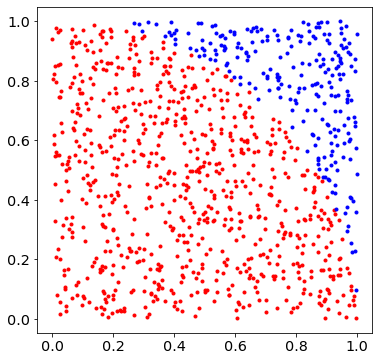

In [ ]:
import random

N = 1000

plt.figure(figsize = (6, 6))
for i in range(N):
    
    x = random.uniform(0, 1)
    y = random.uniform(0, 1)
    
    if x ** 2 + y ** 2 < 1:
        plt.plot(x, y, "r.")
    else:
        plt.plot(x, y, "b.")

### 案例：一張圖兩條線

In [ ]:
import numpy as np

x = np.linspace(-np.pi, np.pi, 21)
y1, y2 = np.cos(x), np.sin(x)

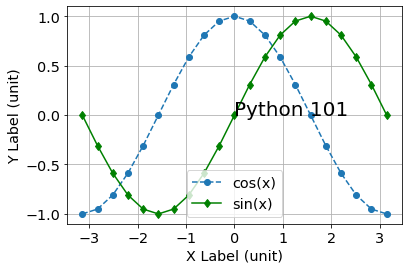

In [ ]:
gcf = plt.figure()
plt.plot(x, y1, marker = "o", linestyle = "--")
plt.plot(x, y2, marker = "d", color = "green")

plt.xlabel("X Label (unit)")
plt.ylabel("Y Label (unit)")
plt.legend(["cos(x)", "sin(x)"], loc = "lower center")
plt.text(0, 0, "Python 101", fontsize = 20)
plt.grid(True)
plt.show()

In [ ]:
gcf.savefig("example.jpg", dpi = 300)
gcf.savefig("example.pdf", dpi = 300)

## 套件：seaborn
- Official seaborn tutorial: https://seaborn.pydata.org/tutorial.html
- Gallery: http://seaborn.pydata.org/examples/index.html

In [ ]:
import seaborn as sns

sns.set_theme(style = "darkgrid")

### 案例：台灣COVID-19的確診人數與累積確診人數


Text(2021-05-19 00:00:00, 500, '三級發佈')

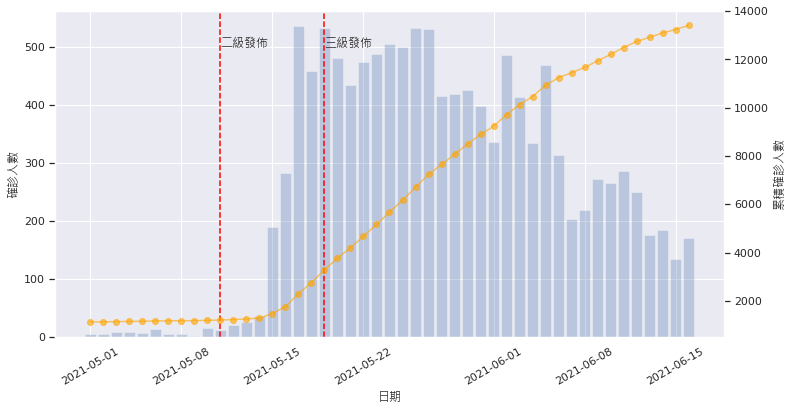

In [ ]:
fig, ax = plt.subplots(figsize = (12, 6))
ax.bar(tbl.index, tbl["確診人數"], alpha = 0.3)
ax.set_xlabel("日期", fontproperties = font)
ax.tick_params(axis = "x", labelrotation = 30)
ax.set_ylabel("確診人數", fontproperties = font)
ax.grid(True)

ax2 = ax.twinx()
ax2.plot(tbl.index, tbl["確診人數累計"], alpha = 0.6, color = "orange", marker = ".", markersize = 12)
ax2.set_ylabel("累積確診人數", fontproperties = font)
ax2.grid(False)

x = pd.to_datetime("2021-05-11")
ax.axvline(x, color = "red", linestyle = "--")
ax.text(x, 500, "二級發佈", fontproperties = font)

x = pd.to_datetime("2021-05-19")
ax.axvline(x, color = "red", linestyle = "--")
ax.text(x, 500, "三級發佈", fontproperties = font)

### 案例：企鵝

- 參考材料：https://github.com/allisonhorst/palmerpenguins

<center>
<img src = "https://github.com/allisonhorst/palmerpenguins/raw/master/man/figures/lter_penguins.png" width = 400px/>
<br>
<img src = "https://github.com/allisonhorst/palmerpenguins/raw/master/man/figures/culmen_depth.png" width = 400px/>
</center>




In [ ]:
sns.set_theme(style = "ticks")

df = sns.load_dataset("penguins")
df.dropna(inplace = True)
df

species     island  bill_length_mm  ...  flipper_length_mm  body_mass_g     sex
0    Adelie  Torgersen            39.1  ...              181.0       3750.0    Male
1    Adelie  Torgersen            39.5  ...              186.0       3800.0  Female
2    Adelie  Torgersen            40.3  ...              195.0       3250.0  Female
4    Adelie  Torgersen            36.7  ...              193.0       3450.0  Female
5    Adelie  Torgersen            39.3  ...              190.0       3650.0    Male
..      ...        ...             ...  ...                ...          ...     ...
338  Gentoo     Biscoe            47.2  ...              214.0       4925.0  Female
340  Gentoo     Biscoe            46.8  ...              215.0       4850.0  Female
341  Gentoo     Biscoe            50.4  ...              222.0       5750.0    Male
342  Gentoo     Biscoe            45.2  ...              212.0       5200.0  Female
343  Gentoo     Biscoe            49.9  ...              213.0       5400.0    Male

[333 rows x 7 columns]

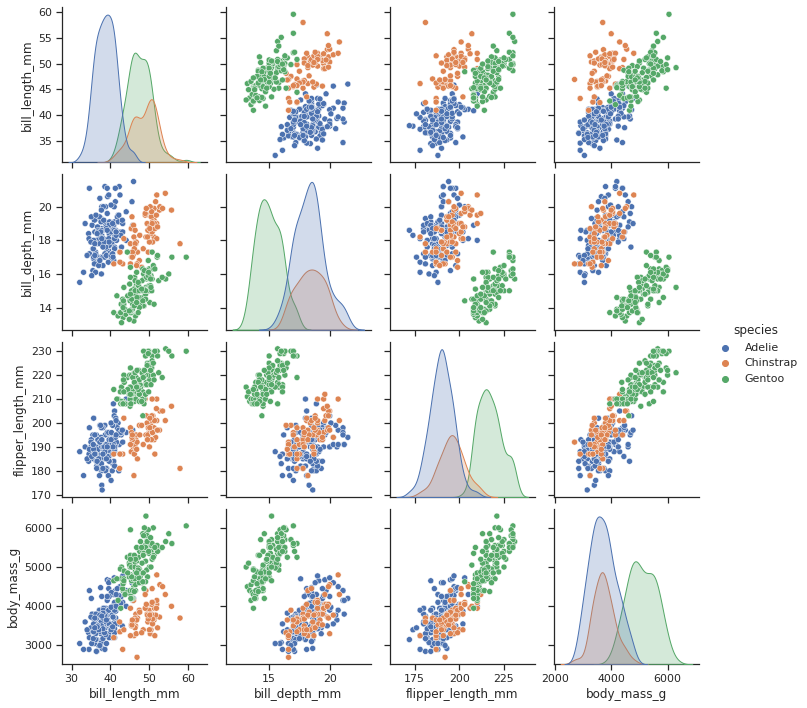

In [ ]:
sns.pairplot(df, hue = "species")